In [1]:
from vnstock import *
from function import *
from operators import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

##### VN30

In [44]:
x='2023-02-14'
ticket = ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']
frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date=x, 
                            end_date=x)    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")
volume = q.pivot_table(values="Volume", columns="ticker", index="TradingDate")

In [ ]:
close= close.to_csv("Data/close.csv",mode="a",header=False)
high= high.to_csv("Data/high.csv",mode="a",header=False)
low= low.to_csv("Data/low.csv",mode="a",header=False)
open= open.to_csv("Data/open.csv",mode="a",header=False)
volume= volume.to_csv("Data/volume.csv",mode="a",header=False)

In [2]:
close= pd.read_csv("Data/close.csv",index_col="TradingDate")
close.index = pd.to_datetime(close.index)
high= pd.read_csv("Data/high.csv",index_col="TradingDate")
high.index = pd.to_datetime(high.index)
low= pd.read_csv("Data/low.csv",index_col="TradingDate")
low.index = pd.to_datetime(low.index)
open= pd.read_csv("Data/open.csv",index_col="TradingDate")
open.index = pd.to_datetime(open.index)
volume= pd.read_csv("Data/volume.csv",index_col="TradingDate")
volume.index = pd.to_datetime(open.index)

returns = close.pct_change()

### Prob weight model

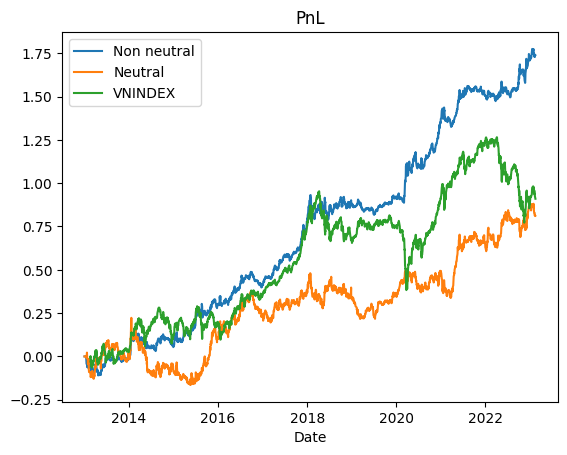

In [5]:
alpha = prob_weights(close,10)

w = weights(alpha,neutrali=0)
w1 = weights(alpha,neutrali=1)

a = Simresult(w,returns=returns)
a.plot_pnl("Non neutral")

b = Simresult(w1,returns=returns)
b.plot_pnl("Neutral")

plot_vnindex()

In [7]:
w1.sum(axis=1)

TradingDate
2013-01-02    0.000000e+00
2013-01-03    0.000000e+00
2013-01-04    0.000000e+00
2013-01-07    0.000000e+00
2013-01-08    0.000000e+00
                  ...     
2023-02-07    2.151057e-16
2023-02-08    1.457168e-16
2023-02-09    4.857226e-17
2023-02-10   -2.105966e-01
2023-02-13   -2.403473e-01
Length: 2522, dtype: float64

In [7]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.173706,1.249533,0.376661,0.848555,461.173615


In [6]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.003629,-0.034341,0.416824,-0.003204,-8.706044
2014,0.058547,0.454120,0.426760,0.168202,137.190193
2015,0.250234,1.965235,0.390751,1.572671,640.393363
2016,0.115262,1.016569,0.409560,0.539288,281.428092
2017,0.368112,4.034072,0.339083,4.203204,1085.609287
2018,0.095185,0.526971,0.366377,0.268601,259.800803
2019,0.049986,0.730352,0.397657,0.258943,125.702440
2020,0.445966,2.378540,0.346717,2.697577,1286.254459
2021,0.136777,0.925160,0.356409,0.573125,383.764155


In [13]:
w1.iloc[-1,:].sort_values(ascending=False)

PLX    0.200000
SAB    0.200000
VCB    0.200000
VHM    0.062634
PDR    0.045957
VIC    0.027435
VPB    0.013476
GVR    0.008527
MSN    0.001624
FPT   -0.000229
MBB   -0.008426
VJC   -0.013777
SSI   -0.016025
VNM   -0.021402
BCM   -0.029417
VIB   -0.030725
ACB   -0.031468
BVH   -0.032452
TCB   -0.042604
POW   -0.047556
HPG   -0.048274
MWG   -0.048676
VRE   -0.056984
NVL   -0.061210
STB   -0.068330
TPB   -0.071852
CTG   -0.086133
GAS   -0.089166
HDB   -0.091813
BID   -0.103483
Name: 2023-02-13 00:00:00, dtype: float64

### Markowitz model

In [30]:
mark = marko_weights(close,lag=10)

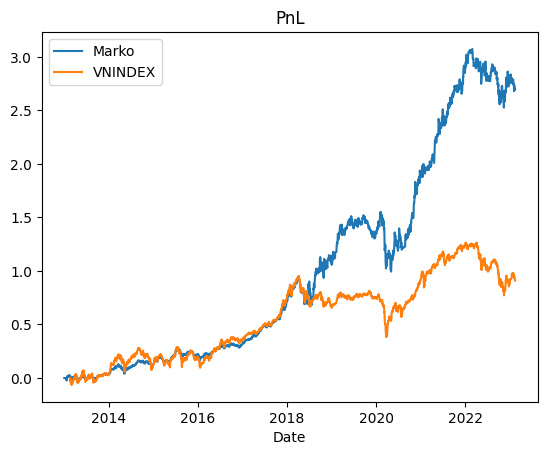

In [4]:
a = Simresult(mark,returns=close.pct_change())
a.plot_pnl("Marko")

plot_vnindex()

### alpha1 = close-ts_product(close,2)^0.5

In [3]:
alpha4 = close-ts_product(close,2)**0.5

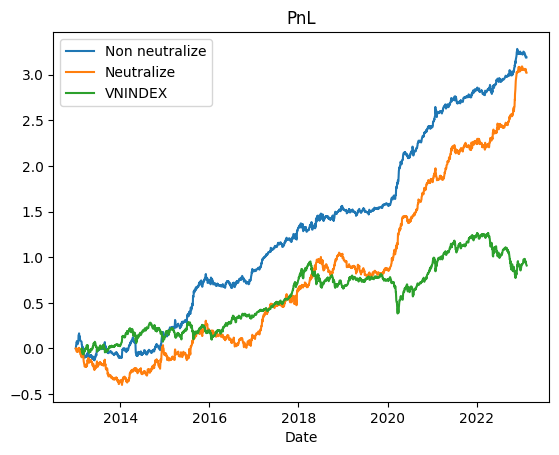

In [4]:
w = weights(alpha4,neutrali=0)
w1 =weights(alpha4,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

### alpha2=ts_zscore(close,2)

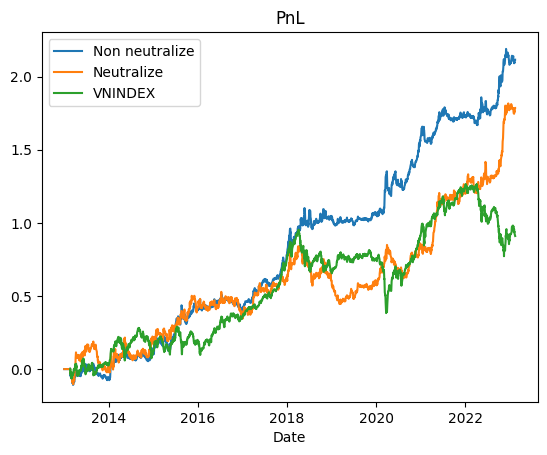

In [3]:
alpha7 = ts_zscore(close,30)
w =weights(alpha7, neutrali=0)
w1 =weights(alpha7,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

### Merge alpha

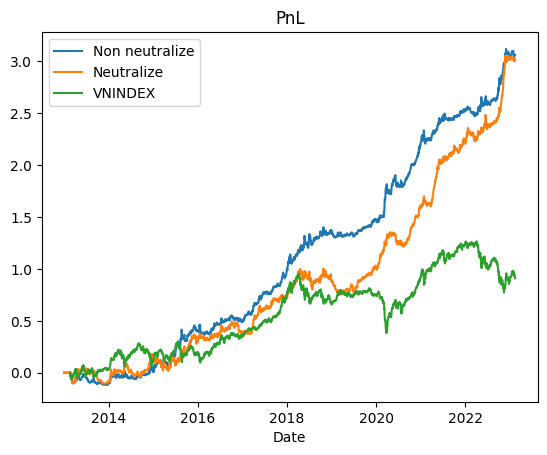

In [8]:
alpha = (0.4*alpha7+0.4*ts_zscore(close,2))
w =weights(alpha, neutrali=0)
w1 =weights(alpha,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [15]:
save_weights(w1,"14/2/2023")

volume/adv20

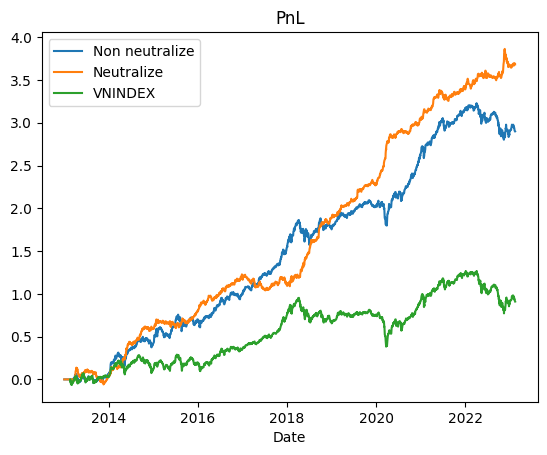

In [51]:
alpha5 = volume/ts_mean(ts_decay_linear(volume,30),20)
w =weights(alpha5, neutrali=0)
w1 =weights(alpha5,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [52]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.029850,0.227334,1.005759,0.039165,29.679548
2014,0.582426,3.437536,1.241021,2.354930,469.311818
2015,0.204796,1.460282,1.158911,0.613864,176.713940
2016,0.380348,2.809653,1.300251,1.519602,292.519191
2017,-0.072893,-0.522667,1.424798,-0.118220,-51.159910
2018,0.782451,4.054278,1.596495,2.838300,490.105695
2019,0.393993,2.933176,1.574876,1.467099,250.174160
2020,0.757728,4.578911,1.370540,3.404654,552.868159
2021,0.358338,2.171725,1.395927,1.100322,256.702367


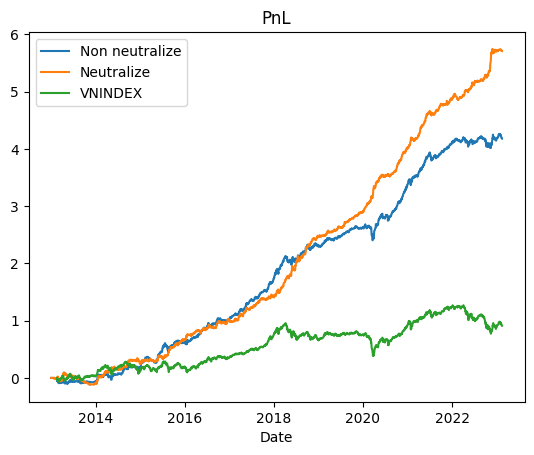

In [33]:
alpha = alpha5+0.7*mark+1.2*ts_zscore(close,2)
w =weights(alpha, neutrali=0)
w1 =weights(alpha,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [34]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.569826,3.396661,1.839715,1.890375,309.735768


In [35]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.095698,-0.750700,0.493068,-0.330723,-194.086075
2014,0.351738,2.210991,1.082319,1.260431,324.985750
2015,0.418215,2.549268,1.552884,1.322958,269.315187
2016,0.326718,2.154707,1.531400,0.995245,213.345686
2017,0.445364,3.104776,2.107900,1.427129,211.283470
2018,1.039478,4.854047,2.191112,3.343330,474.406444
2019,0.434860,3.737922,2.154351,1.679372,201.852042
2020,1.125123,6.480143,2.175181,4.660548,517.255008
2021,0.848003,4.647109,2.294039,2.825408,369.655101


In [128]:
save_weights(w1,"14/2/2023")